In [1]:
# coding: utf-8

# reference: https://www.analyticsvidhya.com/blog/\
# 2016/01/complete-tutorial-learn-data-science-python-scratch-2/

# version = 0.2, date 9/30/2016

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
get_ipython().magic(u'matplotlib inline')


df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')


df.head(5)


/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# let's find out the data types of each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [3]:
# show the statistics for features contain numerical values
# we can see data are not clean, have missing items.
df.describe()

/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b143bd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b381d90>]], dtype=object)

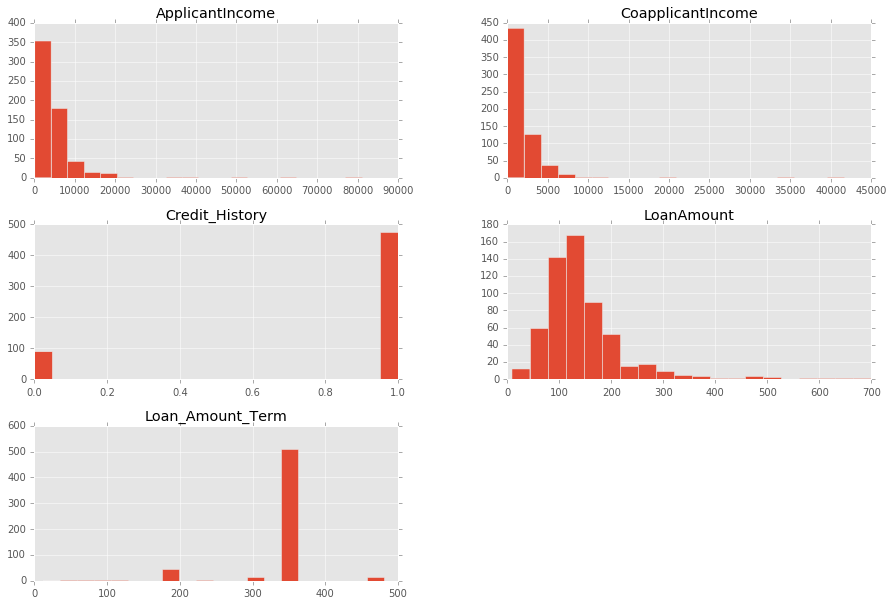

In [4]:
# Use histogram to visualize distribution of continuous features
#
#df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
#   .index.values].hist(bins=20, figsize=[15,10])
df.hist(bins=20, figsize=[15,10])

OrderedDict([('ApplicantIncome',
              {'boxes': [<matplotlib.lines.Line2D at 0x10bf503d0>],
               'caps': [<matplotlib.lines.Line2D at 0x10bf61250>,
               'fliers': [<matplotlib.lines.Line2D at 0x10bf6d550>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x10bf61ed0>],
               'whiskers': [<matplotlib.lines.Line2D at 0x10ba75e50>,
                <matplotlib.lines.Line2D at 0x10bf50bd0>]}),
             ('CoapplicantIncome',
              {'boxes': [<matplotlib.lines.Line2D at 0x10bf6dfd0>],
               'caps': [<matplotlib.lines.Line2D at 0x10bf79f10>,
               'fliers': [<matplotlib.lines.Line2D at 0x10bf92250>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x10bf87bd0>],
               'whiskers': [<matplotlib.lines.Line2D at 0x10bf79210>,
                <matplotlib.lines.Line2D at 0x10bf798d0>]}),
             ('LoanAmount',
              {'boxes': [<matplotlib.lin

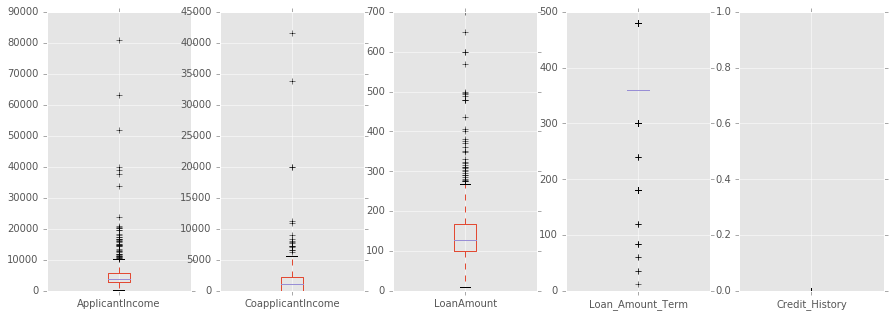

In [5]:
# from the hist chart, it seems income and loanamount distribution isn't normal
# and has some outliers, let's take a detailed look with boxplot

df.plot(kind='box', return_type='dict' , subplots = True, figsize=(15,5))

In [6]:
# With boxplot, we confirmed income data exists outliers. 

# Univariate Analysis for categorical features

categorical = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for col in categorical:
    print df[col].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


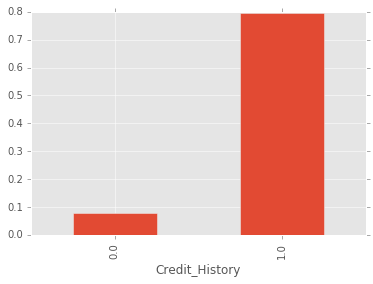

In [7]:
# Bi-Variate Analysis

# use pivot table if index is categorical values

# Use Pivot table explore relationship between Loan_Status and Credit_History
df.pivot_table(values='Loan_Status',
               index=['Credit_History'],
               aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()).plot(kind='bar')


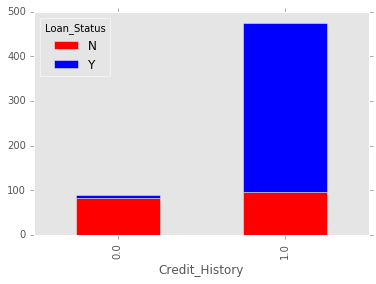

In [8]:
# It shows the probability of getting a loan is 8 times higher with a credit history!

# Visualize the relationship between loan_status and credit history with stacked bar plot

pd.crosstab(df['Credit_History'],df['Loan_Status']).plot(kind='bar',
                                                         stacked=True,
                                                         color=['red','blue'],
                                                         grid=False)


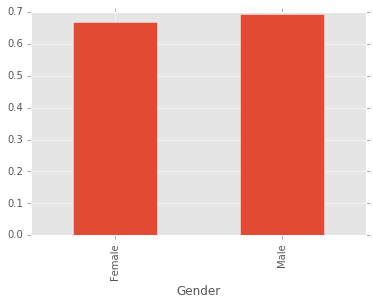

In [9]:
# explore Geder and Loan_Status relationship

df.pivot_table(values='Loan_Status',
               index=['Gender'],
               aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()).plot(kind='bar')


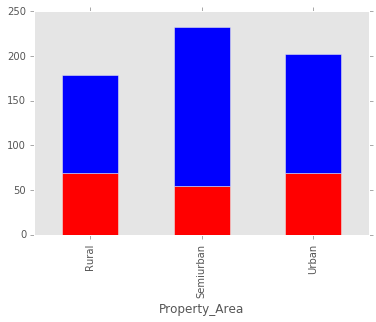

In [10]:
# it seems loan_status rate is about the same across gender.

# Now explore Property_Area and Loan_status

pd.crosstab(df['Property_Area'], df['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'], grid=False, legend=False)

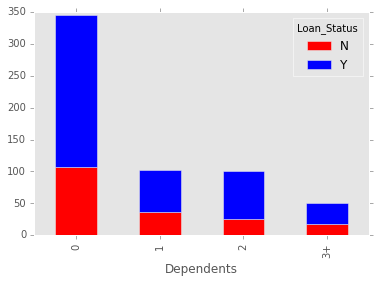

In [11]:
# Loan_status and Dependents

pd.crosstab(df['Dependents'], df['Loan_Status']).plot(kind='bar', stacked=True, color=['red','blue'], grid=False)


In [12]:
# Data munging

# find out NaN values.  x is the Serie type.
df.apply(lambda x: x.isnull().sum()) 


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# check the value distribution
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
# FE-1: From the distribution, replace missing with NO is a good guess.
df['Self_Employed'].fillna('No',inplace=True)

In [15]:
# Treat the missing values in Loan Amount

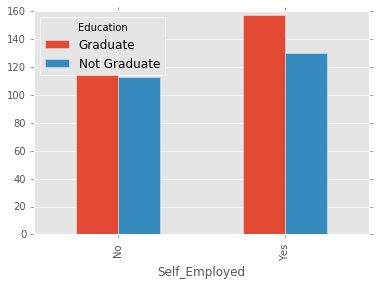

In [16]:
# Domain knowledge tells us loan amount would be associate with Self_Employed,
# since self employed would need more money.

# FE-2a
# let's use Pivot table to examine how loan amount is aggregated
# we use self employed status as index and Education values as columns
# later we can swap education to something else if we think it affect loan amount.
table = df.pivot_table(values='LoanAmount', 
                       index='Self_Employed',
                       columns='Education', # columns are categorical values of Education
                       aggfunc=np.median) 

table.plot(kind='bar')

In [17]:
# FE-2b Replace missing values with the sub-category median.
# this is better than use median of all because sub-category differs.

def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [18]:
# Let's see missing values in Gender
df[df['Gender'].isnull()].head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N


In [19]:
# it seems that we might guess the gender based ApplicantIncome and CoapplicantIncome
# FE-3a

df['BreadWinner']=df['ApplicantIncome']>df['CoapplicantIncome']
df['BreadWinner'].value_counts()

True     541
False     73
Name: BreadWinner, dtype: int64

In [20]:
# FE-3b Now let's treat missing values in gender

df.loc[(df['BreadWinner']) & (df['Gender'].isnull()),'Gender'] = 'Male'
df['Gender'].fillna('Female', inplace=True)

In [21]:
# FE-4a convert Dependents to integer, excluding null values

# this take a column/Series, so x is an element of Series.
df['Dependents'] = df['Dependents'].apply(lambda x: int(x.replace('+','')) if pd.notnull(x) else None)

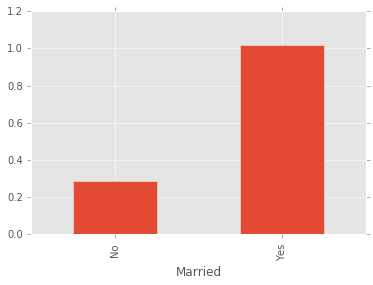

In [22]:
# Find out mean dependents in two groups: Married and not Married

table = df.pivot_table(values='Dependents', 
                       index='Married',
                       #columns='Education', # columns are categorical values of Education                      
                       aggfunc=np.mean)
table.plot(kind='bar')

In [23]:
# so on average, married group has 3 times dependents than not married.
# here is how to fill the missing values in dependents
# - if married, fill 1 ( subgroup mean)
# - if not married, fill ( 0, close to subgroup mean)
# - if don't know, fill 1 ( group mean )

# FE-4b
df.loc[(df['Dependents'].isnull()) & (df['Married']=='No'),'Dependents'] = 0
df['Dependents'].fillna(1, inplace = True)
# FE-4c create another feature HasDependents
df['hasDependents'] = df['Dependents']>0

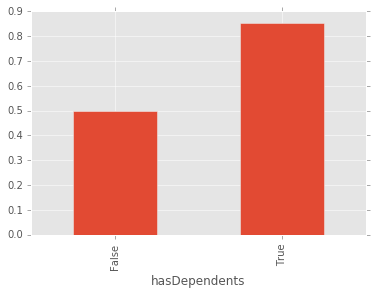

In [24]:
# find out the percentage of married in two catergory: has dependents or no dependents
table = df.pivot_table(values='Married', 
                       index='hasDependents',                      
                       aggfunc=lambda x:x.map({'Yes':1,'No':0}).mean())
table.plot(kind='bar')

In [25]:
# FE-5a
df['DoubleIncome'] = df['CoapplicantIncome']>0

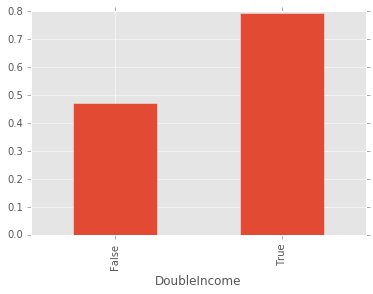

In [26]:
table = df.pivot_table(values='Married', 
                       index='DoubleIncome',                      
                       aggfunc=lambda x:x.map({'Yes':1,'No':0}).mean())
table.plot(kind='bar')

In [27]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [28]:
# FE-5b Fill missing values in Married 

# one can either use doubleincome or majority value
# let's choose double income
df.loc[(df['Married'].isnull()) & (df['DoubleIncome']), 'Married'] = 'Yes'
df['Married'].fillna('No', inplace=True)

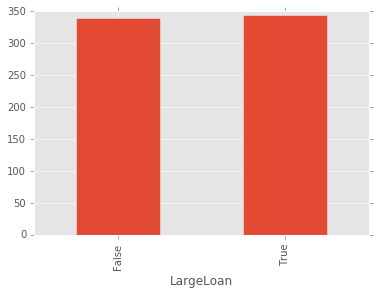

In [29]:
# Loan_Amount_Term should be related to LoanAmount

# let's find out if large loan has a longer term

# this is one way to change continuous feature to categorical so that we can pivot.
# FE-6a
df['LargeLoan'] = df['LoanAmount']>df['LoanAmount'].median()
table = df.pivot_table(values='Loan_Amount_Term', 
                       index='LargeLoan',                     
                       aggfunc=np.mean)
table.plot(kind='bar')

In [30]:
# it turns out that mean loan term is same, no matter large or small loan.

# FE-6
df['Loan_Amount_Term'].fillna(360.0, inplace = True)

In [31]:
# no idea how to infer credit history, look like 1 is majority
# however, it is the major effect on loan status
# it is a hard choice. 50 records is ~8% of data
# by comparing the two results, chooseing drop these is better.

# FE-7
df.dropna(inplace = True)
#df['Credit_History'].fillna(1,inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cf50550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d056f50>]], dtype=object)

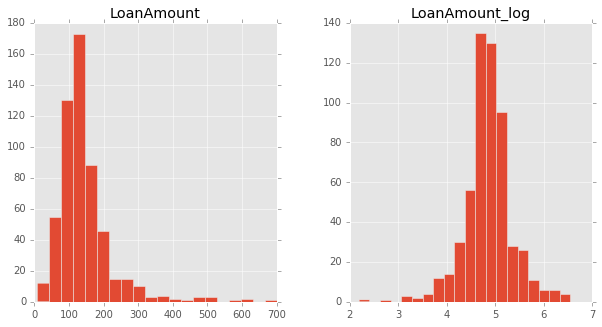

In [32]:
# let's treat extremes

# Loan Amount

# FE-8
# use log to transform distribution
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df[['LoanAmount','LoanAmount_log']].hist(bins=20, figsize = (10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d219550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d2b05d0>]], dtype=object)

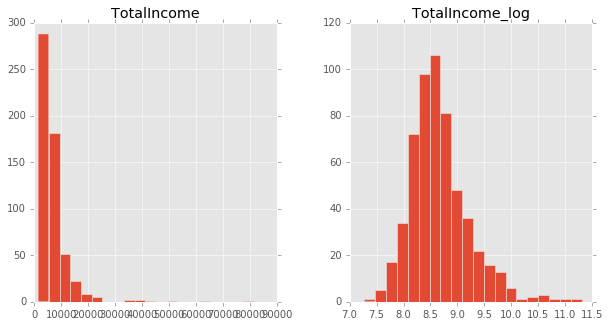

In [33]:
# Income treatment

# create a new TotalIncome feature
# use log to make distribution look better.

# FE-9
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df[['TotalIncome','TotalIncome_log']].hist(bins=20, figsize = (10,5)) 

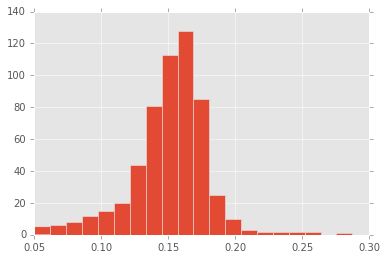

In [34]:
# with some domain knowledge, we know loan status is related to debit ratio,
# let's create a new feature DebitRatio

import math
# FE-10
df['DebitRatio'] = (df['LoanAmount']/df['TotalIncome']).apply(lambda x:math.sqrt(x))
df['DebitRatio'].hist(bins=20)

In [35]:
# let's encode values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Gender','Married','Dependents','Education','Self_Employed',
           'Property_Area','Loan_Status','BreadWinner','hasDependents','DoubleIncome',
          'LargeLoan']
for i in var_mod:
    df[i] = le.fit_transform(df[i]) 

In [36]:
# done with feature engineering! Now let's take a look:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,BreadWinner,hasDependents,DoubleIncome,LargeLoan,LoanAmount_log,TotalIncome,TotalIncome_log,DebitRatio
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,...,2,1,1,0,0,1,4.867534,5849.0,8.674026,0.149084
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,...,0,0,1,1,1,0,4.852030,6091.0,8.714568,0.144964
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,...,2,1,1,0,0,0,4.189655,3000.0,8.006368,0.148324
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,...,2,1,1,0,1,0,4.787492,4941.0,8.505323,0.155842
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,...,2,1,1,0,0,1,4.948760,6000.0,8.699515,0.153297


In [37]:
# feature extraction 

# since the test performance is a lot worse than training, xgb is overfit. 
# dimension reduction-> select few features based on xgb feature importance.
#predictor_var =['Credit_History','LoanAmount_log', 'TotalIncome_log', 'DebitRatio']

predictor_var = [ col for col in df.columns if col not in ['Loan_ID', 'Loan_Status'] ]
                
categorical_var = ['Credit_History','Gender', 'Married','Education','Self_Employed',
               'Property_Area','BreadWinner','DoubleIncome',
                'hasDependents','LargeLoan']
categorical = [ i for i in predictor_var if i in categorical_var ]
non_categorical = [ i for i in predictor_var if i not in categorical ]
                
outcome_var = 'Loan_Status'
categorical, non_categorical

(['Gender',
  'Married',
  'Education',
  'Self_Employed',
  'Credit_History',
  'Property_Area',
  'BreadWinner',
  'hasDependents',
  'DoubleIncome',
  'LargeLoan'],
 ['Dependents',
  'ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'LoanAmount_log',
  'TotalIncome',
  'TotalIncome_log',
  'DebitRatio'])

In [38]:
# One hot encoding categorical features

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False) #categorical_features=[0], sparse = False
X_cat_sparse = ohe.fit_transform(df[categorical])

In [39]:
# Standarize non-categorical features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_non_cat = sc.fit_transform(df[non_categorical])

In [40]:
#from scipy.sparse import hstack, for sparse
from numpy import hstack # for non sparse X
X = hstack((X_non_cat, X_cat_sparse))
y = df[outcome_var]
X.shape, X_non_cat.shape, X_cat_sparse.shape

((564, 30), (564, 9), (564, 21))

In [41]:
#assert( np.isfinite(X.toarray()).all().all() & np.isfinite(y).all() )

In [42]:
# now let's pick some models to predict loan status

#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics


#Generic function for making a classification model and accessing performance:
def classification_model(model, X, y, cv=10):
  #Fit the model:
  model.fit(X,y)
  
  #Make predictions on training set:
  predictions = model.predict(X)
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,y)
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(X.shape[0], n_folds=cv)
  error = []
  for train, test in kf:
    # Filter training data
    #train_predictors = (X.iloc[train,:])
    # sparse matrix need call tocsc before indexing.
    #train_predictors = X.tocsc()[train,:]
    train_predictors = (X[train,:])
    
    # The target we're using to train the algorithm.
    train_target = y.iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    #error.append(model.score(X.iloc[test,:], y.iloc[test]))
    #error.append(model.score(X.tocsc()[test,:], y.iloc[test]))
    error.append(model.score(X[test,:], y.iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(X,y) 


/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
from sklearn.model_selection import learning_curve
# http://scikit-learn.org/stable/modules/generated\
#/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='roc_auc'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [44]:
# The best is .77778
lr_model = LogisticRegression(C=0.2)
classification_model(lr_model, X, y)

Accuracy : 81.738%
Cross-Validation Score : 81.751%


In [45]:
#from sklearn.model_selection import validation_curve

#train_scores, valid_scores = validation_curve(lr_model, X, y, "C", np.logspace(-7, 3, 3), scoring="roc_auc")


<module 'matplotlib.pyplot' from '/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

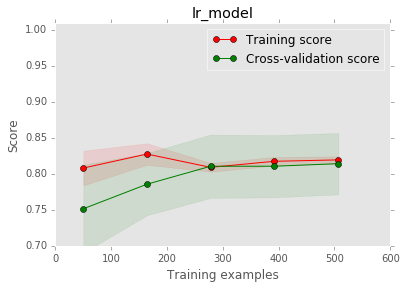

In [46]:
plot_learning_curve(lr_model, "lr_model", X, y, ylim=(0.7, 1.01), cv=10, n_jobs=4)

In [47]:
dt_model = DecisionTreeClassifier(max_depth=1)
classification_model(dt_model, X,y)
print dt_model.tree_.node_count

Accuracy : 81.560%
Cross-Validation Score : 81.573%
3


<module 'matplotlib.pyplot' from '/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

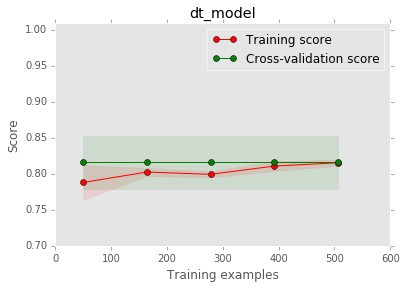

In [48]:
plot_learning_curve(dt_model, "dt_model", X, y, ylim=(0.7, 1.01), cv=10, n_jobs=4)

In [49]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_split=5,min_samples_leaf=1)
classification_model(rf_model, X,y)
# best score = .791666667.  100,3,5,1

Accuracy : 82.092%
Cross-Validation Score : 81.394%


<module 'matplotlib.pyplot' from '/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

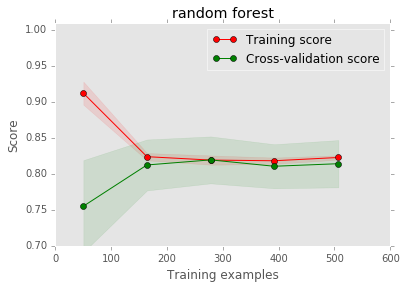

In [50]:
plot_learning_curve(rf_model, "random forest", X, y, ylim=(0.7, 1.01), cv=10, n_jobs=4)

In [51]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf', random_state=0, gamma=0.10, C=1)
classification_model(svm_model, X,y)

Accuracy : 85.284%
Cross-Validation Score : 80.865%


<module 'matplotlib.pyplot' from '/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

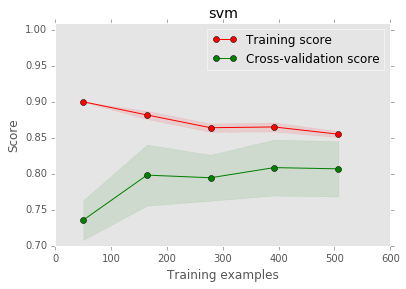

In [52]:
plot_learning_curve(svm_model, "svm", X, y, ylim=(0.7, 1.01), cv=10, n_jobs=4)

In [53]:
from sklearn.grid_search import GridSearchCV   #Perforing grid search

param_test1 = {
    'C':(1e-5,1e-2,1,10)
}

gsearch1 = GridSearchCV(estimator = svm.SVC(kernel='rbf', random_state=0, gamma=1), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=10, verbose=0)

gsearch1.fit(X, y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: 0.75808, std: 0.07449, params: {'C': 1e-05},
  mean: 0.74506, std: 0.07397, params: {'C': 0.01},
  mean: 0.74571, std: 0.07344, params: {'C': 1},
  mean: 0.72077, std: 0.06075, params: {'C': 10}],
 {'C': 1e-05},
 0.7580801819488336)

In [54]:
param_test1 = {
    'gamma':(1e-5,1e-3,.1,1,10)
}

gsearch1 = GridSearchCV(estimator = svm.SVC(kernel='rbf', random_state=0, gamma=0.10, C=1e-5), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=10, verbose=0)

gsearch1.fit(X, y)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.73880, std: 0.06884, params: {'gamma': 1e-05},
  mean: 0.74188, std: 0.06690, params: {'gamma': 0.001},
  mean: 0.75552, std: 0.06725, params: {'gamma': 0.1},
  mean: 0.75808, std: 0.07449, params: {'gamma': 1},
  mean: 0.63719, std: 0.04924, params: {'gamma': 10}],
 {'gamma': 1},
 0.7580801819488336)

/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/sklearn/grid_search.py:426: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in Gr

<module 'matplotlib.pyplot' from '/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

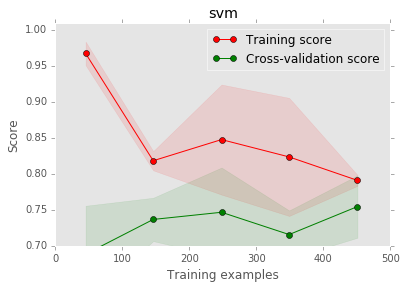

In [55]:
plot_learning_curve(gsearch1, "svm", X, y, ylim=(0.7, 1.01), cv=5, n_jobs=4)

In [56]:
# pipeline

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([#('scl', StandardScaler()),
    ('pca', PCA(n_components=4)),
    ('clf', svm_model)])
classification_model(pipe_lr, X,y)

Accuracy : 69.858%
Cross-Validation Score : 67.907%


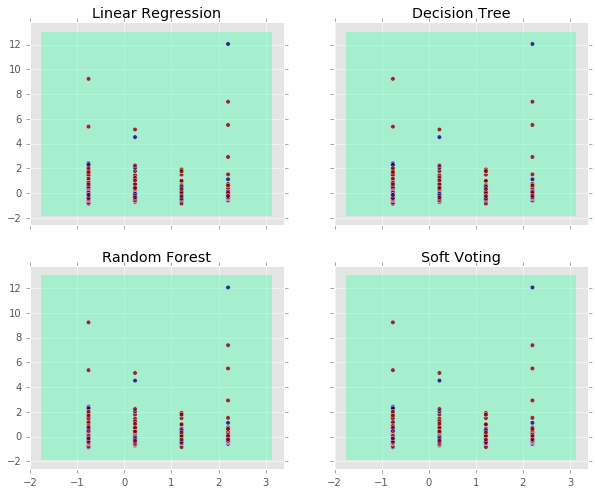

In [57]:
# emsemble
from sklearn.ensemble import VotingClassifier

# This only works if X has two features.
def plot_decision_boundary(X,y):
    from itertools import product

    # Training classifiers
    clf1 = LogisticRegression(C=0.2)
    clf2 = DecisionTreeClassifier(max_depth=1)
    clf3 = RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_split=5,min_samples_leaf=1)
    eclf = VotingClassifier(estimators=[('lr', clf1), ('dt', clf2),
                                        ('rf', clf3)],
                            voting='soft', weights=[2, 1, 2])

    clf1.fit(X, y)
    clf2.fit(X, y)
    clf3.fit(X, y)
    eclf.fit(X, y)

    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

    for idx, clf, tt in zip(product([0, 1], [0, 1]),
                            [clf1, clf2, clf3, eclf],
                            ['Linear Regression', 'Decision Tree',
                             'Random Forest', 'Soft Voting']):

        # expect 24 features but got 2
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
        axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
        axarr[idx[0], idx[1]].set_title(tt)


plot_decision_boundary(X[:,0:2],y)       

[0]	train-auc:0.794853	test-auc:0.754837
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 10 rounds.
[1]	train-auc:0.825474	test-auc:0.754838
[2]	train-auc:0.8349	test-auc:0.754447
[3]	train-auc:0.853957	test-auc:0.75695
[4]	train-auc:0.875222	test-auc:0.75492
[5]	train-auc:0.883737	test-auc:0.762369
[6]	train-auc:0.885235	test-auc:0.75951
[7]	train-auc:0.895359	test-auc:0.77561
[8]	train-auc:0.899689	test-auc:0.78057
[9]	train-auc:0.905536	test-auc:0.779985
[10]	train-auc:0.909455	test-auc:0.777378
[11]	train-auc:0.909627	test-auc:0.772873
[12]	train-auc:0.91228	test-auc:0.779232
[13]	train-auc:0.915142	test-auc:0.782789
[14]	train-auc:0.918513	test-auc:0.783233
[15]	train-auc:0.919802	test-auc:0.782953
[16]	train-auc:0.922543	test-auc:0.780297
[17]	train-auc:0.927233	test-auc:0.779124
[18]	train-auc:0.929885	test-auc:0.780352
[19]	train-auc:0.929734	test-auc:0.782204
[20]	train-auc:0.933764	test-auc:0.78

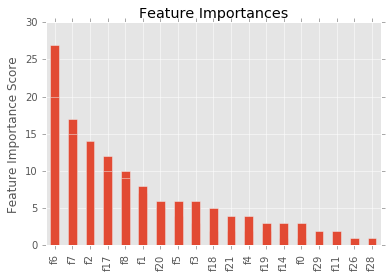

In [58]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.cross_validation import train_test_split

def modelfit(alg, X, y, useTrainCV=True, cv_folds=5, early_stopping_rounds=10):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        dtrain = xgb.DMatrix(X,label=y)
        cvresult = xgb.cv(xgb_param,
                          dtrain,
                          num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,
                          metrics='auc',
                          callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                                     xgb.callback.early_stop(early_stopping_rounds)]
                         )
        
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X, y,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(X)
    dtrain_predprob = alg.predict_proba(X)[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(y.values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=2,
 gamma=0,
 subsample=0.75,
 colsample_bytree=0.6,
 reg_alpha = .01,
 reg_lambda = .01,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=555)
modelfit(xgb1, df[predictor_var], df[outcome_var])


#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=42)
modelfit(xgb1, X, y)

<module 'matplotlib.pyplot' from '/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

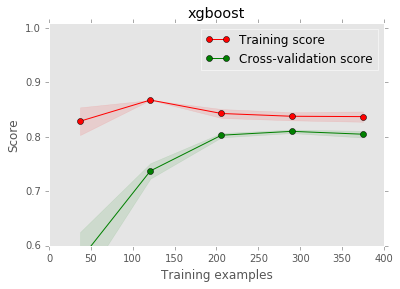

In [59]:
plot_learning_curve(xgb1, "xgboost", X, y, ylim=(0.6, 1.01), cv=3)

In [60]:
# Now we have the model trained. Let's process the test data and predict

print test_df.apply(lambda x:sum(x.isnull()), axis=0)

# FE-1
test_df['Self_Employed'].fillna('No',inplace=True)

# FE-2
table = test_df.pivot_table(values='LoanAmount', 
                       index='Self_Employed',
                       columns='Education', # columns are categorical values of Education
                       aggfunc=np.median)
test_df['LoanAmount'].fillna(test_df[test_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

# FE-3 Now let's treat missing values in gender
test_df['BreadWinner']=test_df['ApplicantIncome']>test_df['CoapplicantIncome']
test_df.loc[(test_df['BreadWinner']) & (test_df['Gender'].isnull()),'Gender'] = 'Male'
test_df['Gender'].fillna('Female', inplace=True)

# FE-4a Dependents
test_df['Dependents'] = test_df['Dependents'].apply(lambda x: int(x.replace('+','')) if pd.notnull(x) else None)
# FE-4b
test_df.loc[(test_df['Dependents'].isnull()) & (test_df['Married']=='No'),'Dependents'] = 0
test_df['Dependents'].fillna(1, inplace = True)
# FE-4c create another feature HasDependents
test_df['hasDependents'] = test_df['Dependents']>0

# FE-5a Married
test_df['DoubleIncome'] = test_df['CoapplicantIncome']>0
test_df.loc[(test_df['Married'].isnull()) & (test_df['DoubleIncome']), 'Married'] = 'Yes'
test_df['Married'].fillna('No', inplace=True)

# FE-6 Loan Amount Term
test_df['LargeLoan'] = test_df['LoanAmount']>test_df['LoanAmount'].median()
test_df['Loan_Amount_Term'].fillna(360.0, inplace = True)

# FE-7
test_df['Credit_History'].fillna(1,inplace = True)

# FE-8
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])

# FE-9
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['TotalIncome_log'] = np.log(test_df['TotalIncome'])

# FE-10
test_df['DebitRatio'] = (test_df['LoanAmount']/test_df['TotalIncome']).apply(lambda x:math.sqrt(x))

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [61]:
test_df.apply(lambda x: x.isnull().sum()) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
BreadWinner          0
hasDependents        0
DoubleIncome         0
LargeLoan            0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
DebitRatio           0
dtype: int64

In [62]:
# Label Encoding
var_mod.remove('Loan_Status')
for i in var_mod:
    test_df[i] = le.fit_transform(test_df[i]) 

In [63]:
# normal matrix
#X_test=test_df[predictor_var]

In [64]:
# sparse matrix
# note here use transform, not fit_tranform
X_test_cat_sparse = ohe.transform(test_df[categorical])
X_test_non_cat = sc.transform(test_df[non_categorical])
X_test = hstack((X_test_non_cat, X_test_cat_sparse))
X_test.shape, X_test_cat_sparse.shape, X_test_non_cat.shape

((367, 30), (367, 21), (367, 9))

In [65]:

eclf = VotingClassifier(estimators=[ ('xgb', xgb1), ('dt', dt_model),('rf', rf_model)],
                        voting='soft',weights=[1,1,1])
classification_model(eclf, X, y)

Accuracy : 81.560%
Cross-Validation Score : 81.573%


<module 'matplotlib.pyplot' from '/Users/mingyuzhu/git/venv/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

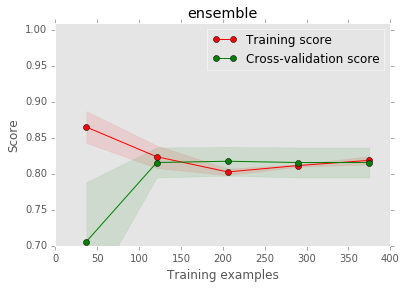

In [66]:
plot_learning_curve(eclf, "ensemble", X, y, ylim=(0.7, 1.01), cv=3)

In [69]:
model = eclf

In [70]:
predictions = model.predict(X_test)
output = pd.DataFrame({ 'Loan_ID' : test_df['Loan_ID'], 'Loan_Status': pd.Series(predictions).map({1:'Y',0:'N'}) })
output.head()
output.to_csv('./submissions/1.csv', index = False)